# Colour trends in album artworks by genre

In this notebook I will use the Spotify API (and the SpotiPy wrapper for python) to get data from Spotify. 

As a test I want to investigate album covers in different genres of music. 
I will compare the colour of album covers in different genres to see if there are any trends.
E.g. are Metal album covers always black?

## Dependencies

In [1]:
import config as cfg

# Spotify stuff
import spotipy  # this is a python wrapper for interacting with the Spotify API
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=cfg.client_id, client_secret=cfg.client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Image tools
from PIL import Image 
import requests
from io import BytesIO

# Numerical
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## Searching for albums

First lets see how we can retrieve album information and view album covers

Unapologetic
Released 2012-12-11


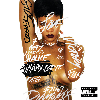

ANTI
Released 2016-01-28


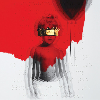

In [2]:
def get_artist_albums(artist):
    # this is a function for finding all the albums of a particular artist

    # this looks up the artists spotify universal resource identifier (URI) 
    artist_uri = spotify.search(q ='artist:' + artist, type='artist')['artists']['items'][0]['uri']

    # this returns all the albums by the artist
    results = spotify.artist_albums(artist_uri, album_type='album')
    albums = results['items']

    # Here we filter out some of the album results. 
    # First we remove albums that have a '(' in their title... 
    # ... this is just a crude way of getting rid of albums such as 'First Album (Remixed)'  and 'Second Album (Remastered)'
    albums_2 = filter(lambda x: '(' not in x['name'], albums)
    # Then we remove any repeated albums (which the search seems to throw up for some reason)
    albums_3 = []
    for album in albums_2:
        album_name_list = [x['name'] for x in albums_3]
        if album['name'] not in album_name_list:
            albums_3.append(album)

    albums_filtered = albums_3
    
    # reverse list so 1st album first
    albums_filtered.reverse()
    
    return albums_filtered

def get_album_cover(album):
    # this retrieves the album cover which is a url. We then convert the url to an image object.
    image_url = album['images'][0]['url']
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).resize((100,100))
    return img

# choose an artist
artist = 'Rihanna'
albums = get_artist_albums(artist)

# Here is an example of some of the information we can get 
for album in albums:
    
    # album name and release date
    print(album['name'])
    print('Released ' + album['release_date'])
    
    img = get_album_cover(album)
    display(img)

Clearly there are some issues as Rihanna definitely has more than two albums. But it will do for now. 

## Album cover colour analysis

To visually analyse the colour of the album covers we replace with a single indicative colour

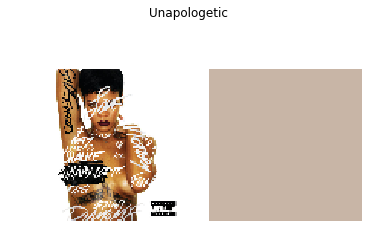

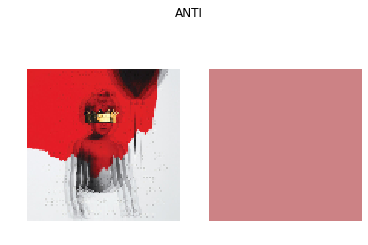

In [3]:
for album in albums:
    
    # get image again
    img = get_album_cover(album)

    # for plotting the origina cover and the indicative colour side by side
    fig, axarr = plt.subplots(1,2)
    fig.suptitle(album['name'])

    axarr[0].imshow(img)
    axarr[0].axis('off')
    # quantize() does the colour averaging here. To my eye it gives a good indication of the general album cover colour.
    # other methods are of course available.
    axarr[1].imshow(img.quantize(1))
    axarr[1].axis('off')

## Searching genres

Now let's quickly see how to search different genres for artists.

In [4]:
def get_genres_artists(genre):
    results = spotify.search(q ='genre:' + genre, type = 'artist')
    name_list = [results['artists']['items'][i]['name'] for i in range(5)]
    return name_list

print(get_genres_artists('Rap'))

['Drake', 'Kanye West', 'Lil Uzi Vert', 'J. Cole', 'Cardi B']


Now we have all the functionality we need. Let's put it to use. 

## Comparing genres

Here I compare colour trends in album covers from 4 different genres.

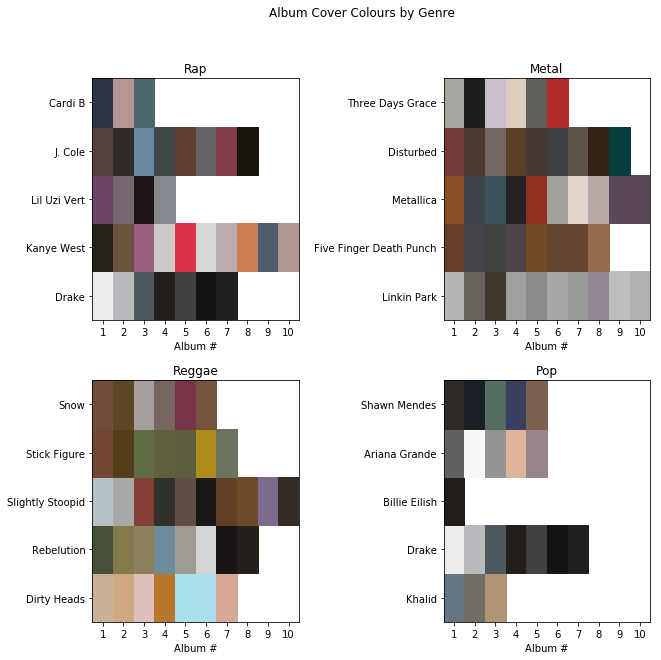

In [5]:
genres = ['Rap', 'Metal', 'Reggae', 'Pop']

fig, axarr = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Album Cover Colours by Genre')
plt.subplots_adjust(wspace = 0.7, hspace = 0.25)

for n_g in range(len(genres)):
    
    axarr.item(n_g).set_title(genres[n_g])
    
    artists = get_genres_artists(genres[n_g])
    N_artists = len(artists)
    
    axarr.item(n_g).set_yticks(np.arange(0.5, N_artists))
    axarr.item(n_g).set_yticklabels(artists)
    
    axarr.item(n_g).set_xticks(np.arange(0.5, 10))
    axarr.item(n_g).set_xticklabels(range(1,11))
    axarr.item(n_g).set_xlabel('Album #')
    
    
    axarr.item(n_g).set_xlim(0, 10)
    axarr.item(n_g).set_ylim(0, N_artists)
        
    n_artist = 0
    for artist in artists:
        albums = get_artist_albums(artist)
        n_album = 0
        for album in albums:
            img = get_album_cover(album)
            rgb = img.quantize(1).getpalette()[:3]
            rgb_tuple = tuple([x/256 for x in rgb])
            rect = Rectangle((n_album,n_artist),1,1, color = rgb_tuple)
            axarr.item(n_g).add_patch(rect)
            n_album += 1
        n_artist += 1
        

So the colour differences are actually not that stark between genre. 

Let's try comparing via Male/Female. 

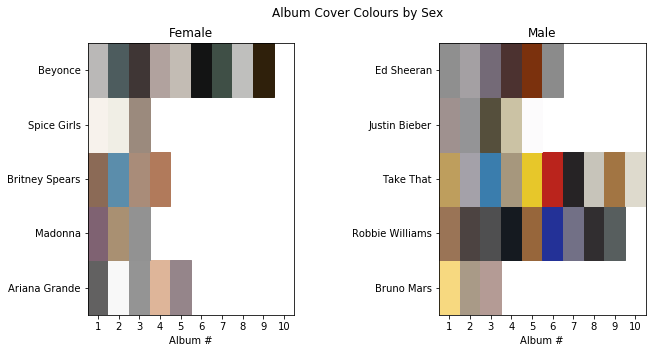

In [6]:
genres = ['Female', 'Male']
artists_bysex = [['Ariana Grande', 'Madonna', 'Britney Spears', 'Spice Girls', 'Beyonce'],
           ['Bruno Mars', 'Robbie Williams', 'Take That', 'Justin Bieber', 'Ed Sheeran']]

fig, axarr = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Album Cover Colours by Sex')
plt.subplots_adjust(wspace = 0.7, hspace = 0.25)

for n_g in range(len(genres)):
    
    axarr.item(n_g).set_title(genres[n_g])
    
    artists = artists_bysex[n_g]
    N_artists = len(artists)
    
    axarr.item(n_g).set_yticks(np.arange(0.5, N_artists))
    axarr.item(n_g).set_yticklabels(artists)
    
    axarr.item(n_g).set_xticks(np.arange(0.5, 10))
    axarr.item(n_g).set_xticklabels(range(1,11))
    axarr.item(n_g).set_xlabel('Album #')
    
    
    axarr.item(n_g).set_xlim(0, 10)
    axarr.item(n_g).set_ylim(0, N_artists)
        
    n_artist = 0
    for artist in artists:
        albums = get_artist_albums(artist)
        n_album = 0
        for album in albums:
            img = get_album_cover(album)
            rgb = img.quantize(1).getpalette()[:3]
            rgb_tuple = tuple([x/256 for x in rgb])
            rect = Rectangle((n_album,n_artist),1,1, color = rgb_tuple)
            axarr.item(n_g).add_patch(rect)
            n_album += 1
        n_artist += 1

Again the differences are not that stark.

## Future analysis

Ideas for improving this work start with focussing on the colour analysis. 
Here I only used a very crude method to look at the 'average' colour of the album cover. Using a method that reveals more data about the album cover (e.g. a spectral analysis) could be key to identifying differences between genres. 

A fun idea may be to use the Spotify API to extract a data set of features (album covers) and labels (genres) for training a convolutional neural network. You could then design a game where players compete with the CNN to see if they can guess more genres correctly. 